In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv(r'E:\Final year project\Emails.csv')

In [5]:
df.rename(columns={'spam':'spear'},inplace=True)

In [6]:
df.head()

,text,spear
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
x=df["text"]

In [9]:
y=df["spear"]

In [10]:
cvec=CountVectorizer()

In [11]:
cx=cvec.fit_transform(x)

In [12]:
cx.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
cx.shape

(5728, 37303)

In [14]:
y.value_counts()

0    4360
1    1368
Name: spear, dtype: int64

In [15]:
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(cx,y)

In [16]:
x_sm

<8720x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 1141655 stored elements in Compressed Sparse Row format>

In [17]:
y_sm

0       1
1       1
2       1
3       1
4       1
       ..
8715    1
8716    1
8717    1
8718    1
8719    1
Name: spear, Length: 8720, dtype: int64

In [18]:
y_sm.value_counts()

1    4360
0    4360
Name: spear, dtype: int64

In [19]:
x_sm.shape

(8720, 37303)

# SVM

In [20]:
x_train, x_test, y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

In [21]:
params={"kernel":["rbf","linear"]}
cval=KFold(n_splits=5)
model=SVC()

In [22]:
gsearch=GridSearchCV(model,params,cv=cval)

In [23]:
gsearch.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), param_grid={'kernel': ['rbf', 'linear']})

In [24]:
gsearch.best_params_

{'kernel': 'linear'}

In [25]:
bmodel=SVC(kernel="rbf")

In [26]:
bmodel.fit(x_train,y_train)

SVC()

In [27]:
y_pred=bmodel.predict(x_test)

In [28]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.9650229357798165

In [41]:
best_model = gsearch.best_estimator_

In [30]:
confusion_matrix(y_test,y_pred)

array([[830,  58],
       [  3, 853]], dtype=int64)

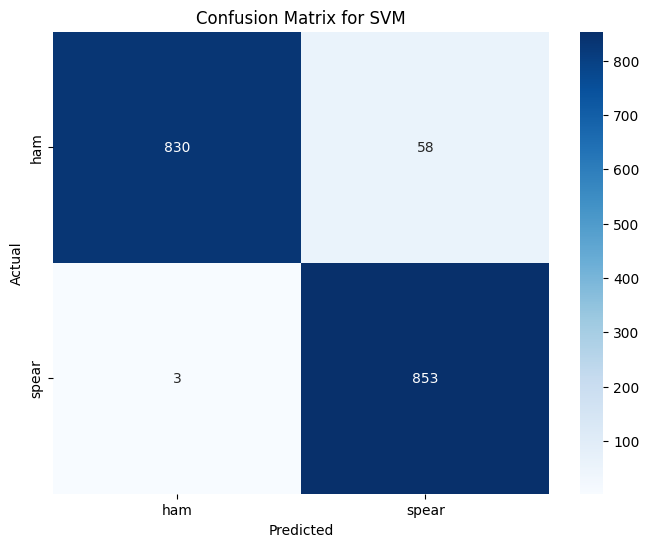

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spear'], yticklabels=['ham', 'spear'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       888
           1       0.94      1.00      0.97       856

    accuracy                           0.97      1744
   macro avg       0.97      0.97      0.97      1744
weighted avg       0.97      0.97      0.97      1744



In [42]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)